#### Importing Important Python Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

#### Exploring and Understanding the Data

In [2]:
# Load data
data = pd.read_csv('creditcard.csv')

In [3]:
# Display the first few rows of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Shape of the dataset
data.shape
# Here, the Credit Card Dataset contains 284807 rows and 31 columns.

(284807, 31)

#### Checking the frequency of frauds

In [6]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

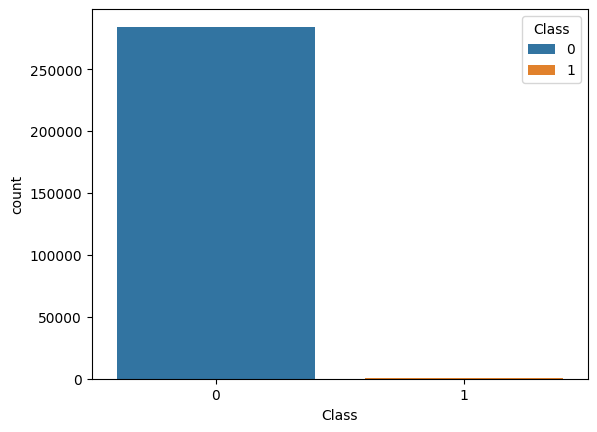

In [7]:
sns.countplot(x=data.Class, hue=data.Class)

#### Data Preprocessing, Data Cleaning

In [8]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Remove duplicate rows if any
data = data.drop_duplicates()

# Confirm removal
print(f'Number of duplicate rows after removal: {data.duplicated().sum()}')

Number of duplicate rows: 1081
Number of duplicate rows after removal: 0


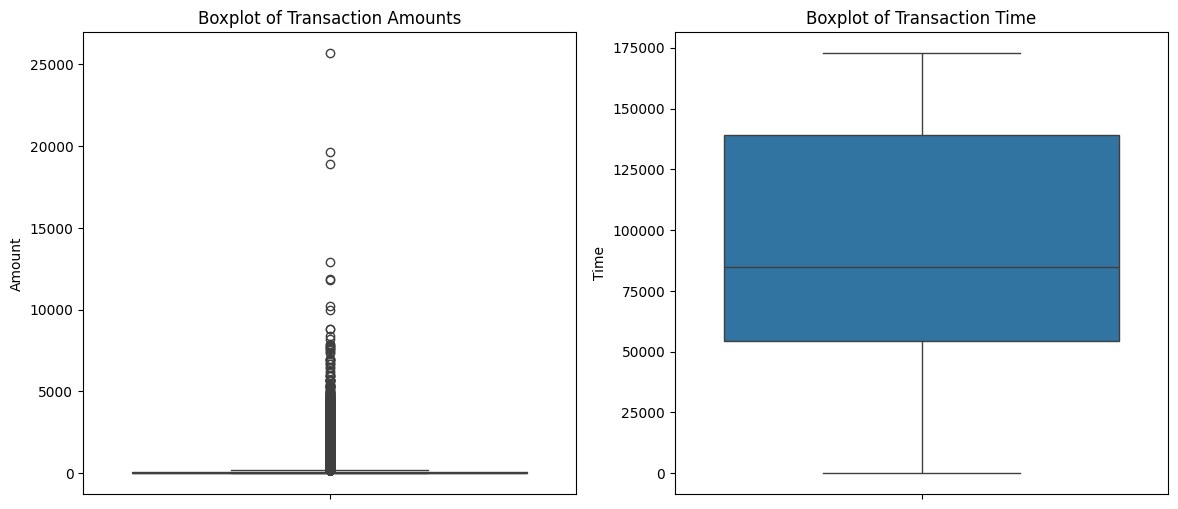

In [10]:
# Handle Outliers
# Visualize 'Amount' and 'Time' features to spot outliers
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=data, y='Amount', ax=ax[0])
ax[0].set_title('Boxplot of Transaction Amounts')
sns.boxplot(data=data, y='Time', ax=ax[1])
ax[1].set_title('Boxplot of Transaction Time')
plt.show()

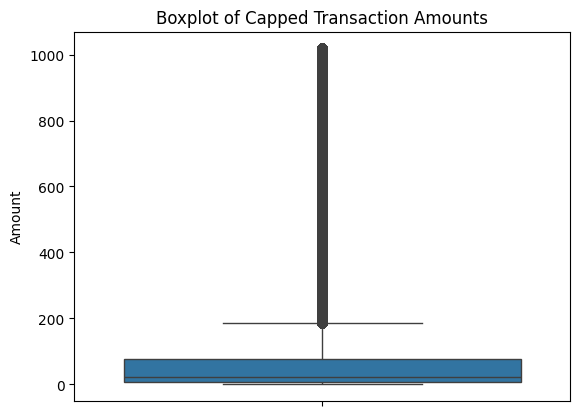

In [11]:
# Optionally, you could cap or remove outliers if they significantly impact the model
# Example: Capping the 'Amount' feature at the 99th percentile
amount_cap = data['Amount'].quantile(0.99)
data['Amount'] = np.where(data['Amount'] > amount_cap, amount_cap, data['Amount'])

# Verify capping
sns.boxplot(data=data, y='Amount')
plt.title('Boxplot of Capped Transaction Amounts')
plt.show()

In [12]:
# Standardize and Normalize Features
# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Check the effect of scaling
print(data[['Time', 'Amount']].describe())

               Time        Amount
count  2.837260e+05  2.837260e+05
mean   1.218105e-16  4.167200e-17
std    1.000002e+00  1.000002e+00
min   -1.996823e+00 -5.037389e-01
25%   -8.552128e-01 -4.686102e-01
50%   -2.131081e-01 -3.657335e-01
75%    9.369423e-01 -1.752085e-02
max    1.642362e+00  5.888199e+00


In [13]:
# Verify Data Types
# Check data types
print(data.dtypes)

# Convert data types if needed
# For example, if 'Time' or 'Amount' are not numeric, convert them:
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Verify conversion
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       floa

In [14]:
# Check the scale of PCA-transformed features
pca_features = data.columns[1:29]  # V1 to V28
print("Scale of PCA-transformed features:\n", data[pca_features].describe())

Scale of PCA-transformed features:
                   V1             V2             V3             V4  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.005917      -0.004135       0.001613      -0.002966   
std         1.948026       1.646703       1.508682       1.414184   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.915951      -0.600321      -0.889682      -0.850134   
50%         0.020384       0.063949       0.179963      -0.022248   
75%         1.316068       0.800283       1.026960       0.739647   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.001828      -0.001139       0.001801      -0.000854   
std         1.377008       1.331931       1.227664       1.179054   
min      -113.743307     -26.160506     -43.557242     -73.216718 

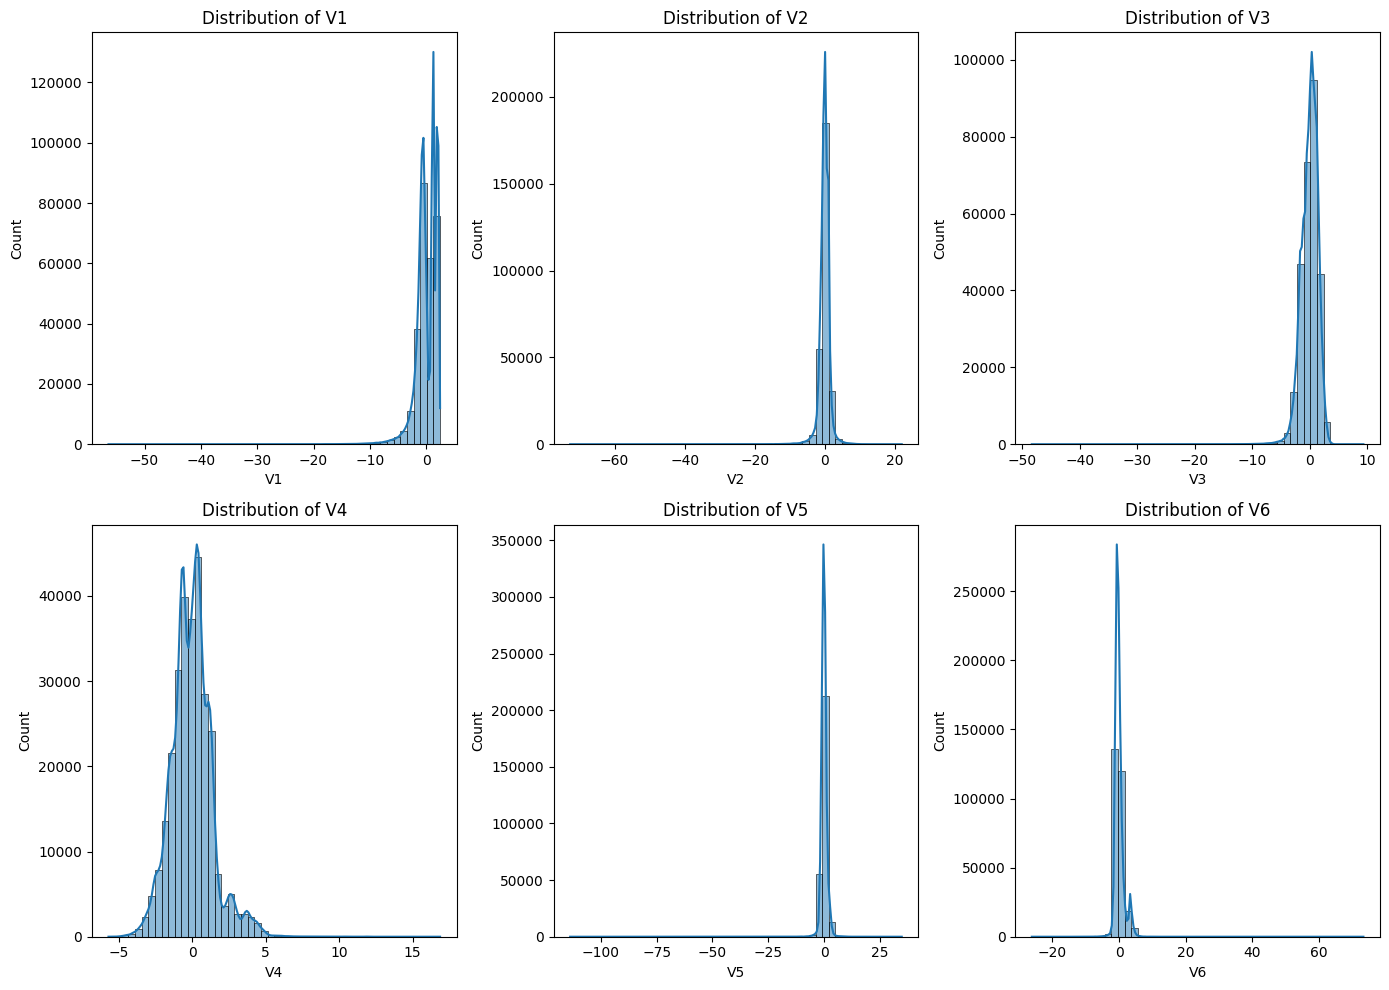

In [15]:
# Visualize the distribution of a few PCA-transformed features to confirm scaling
plt.figure(figsize=(14, 10))
for i, feature in enumerate(pca_features[:6], 1):  # Plot first 6 PCA features
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#### Exploratory Data Analysis (EDA)

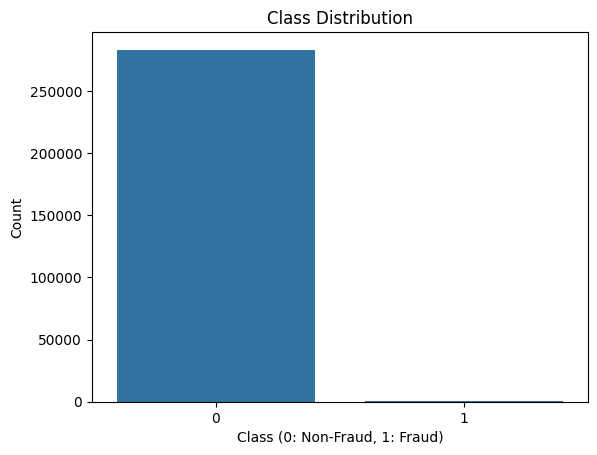

In [16]:
# Visualize the class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

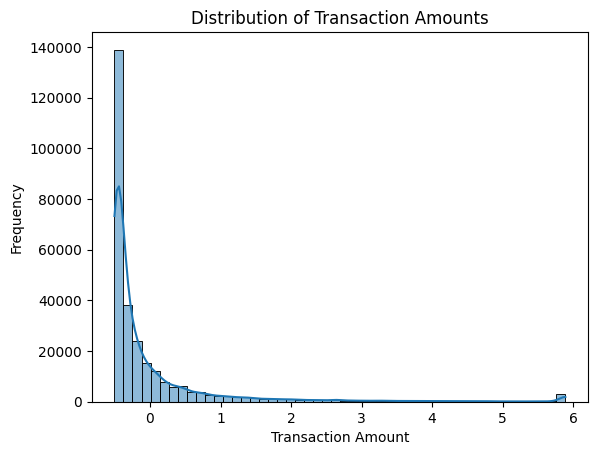

In [17]:
# Visualize the distribution of the 'Amount' feature
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

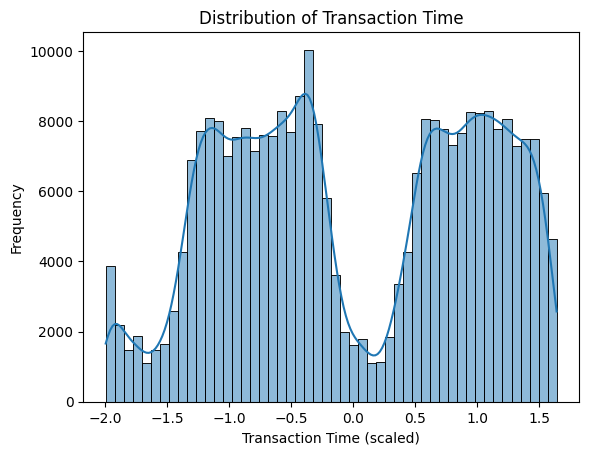

In [18]:
# Visualize the distribution of the 'Time' feature
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Transaction Time (scaled)')
plt.ylabel('Frequency')
plt.show()

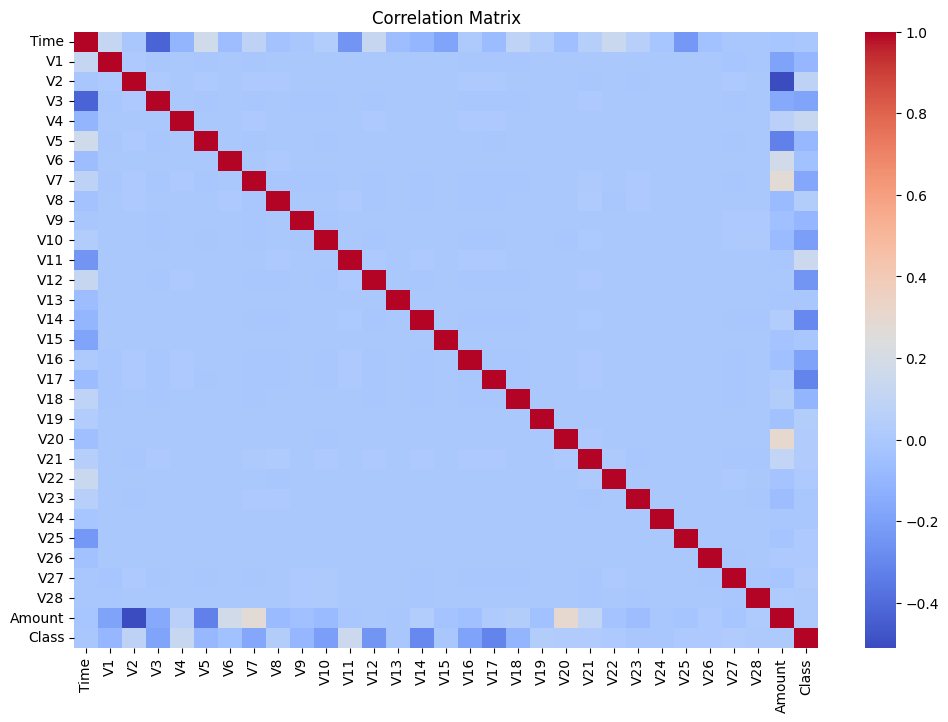

In [19]:
# Correlation matrix to understand feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

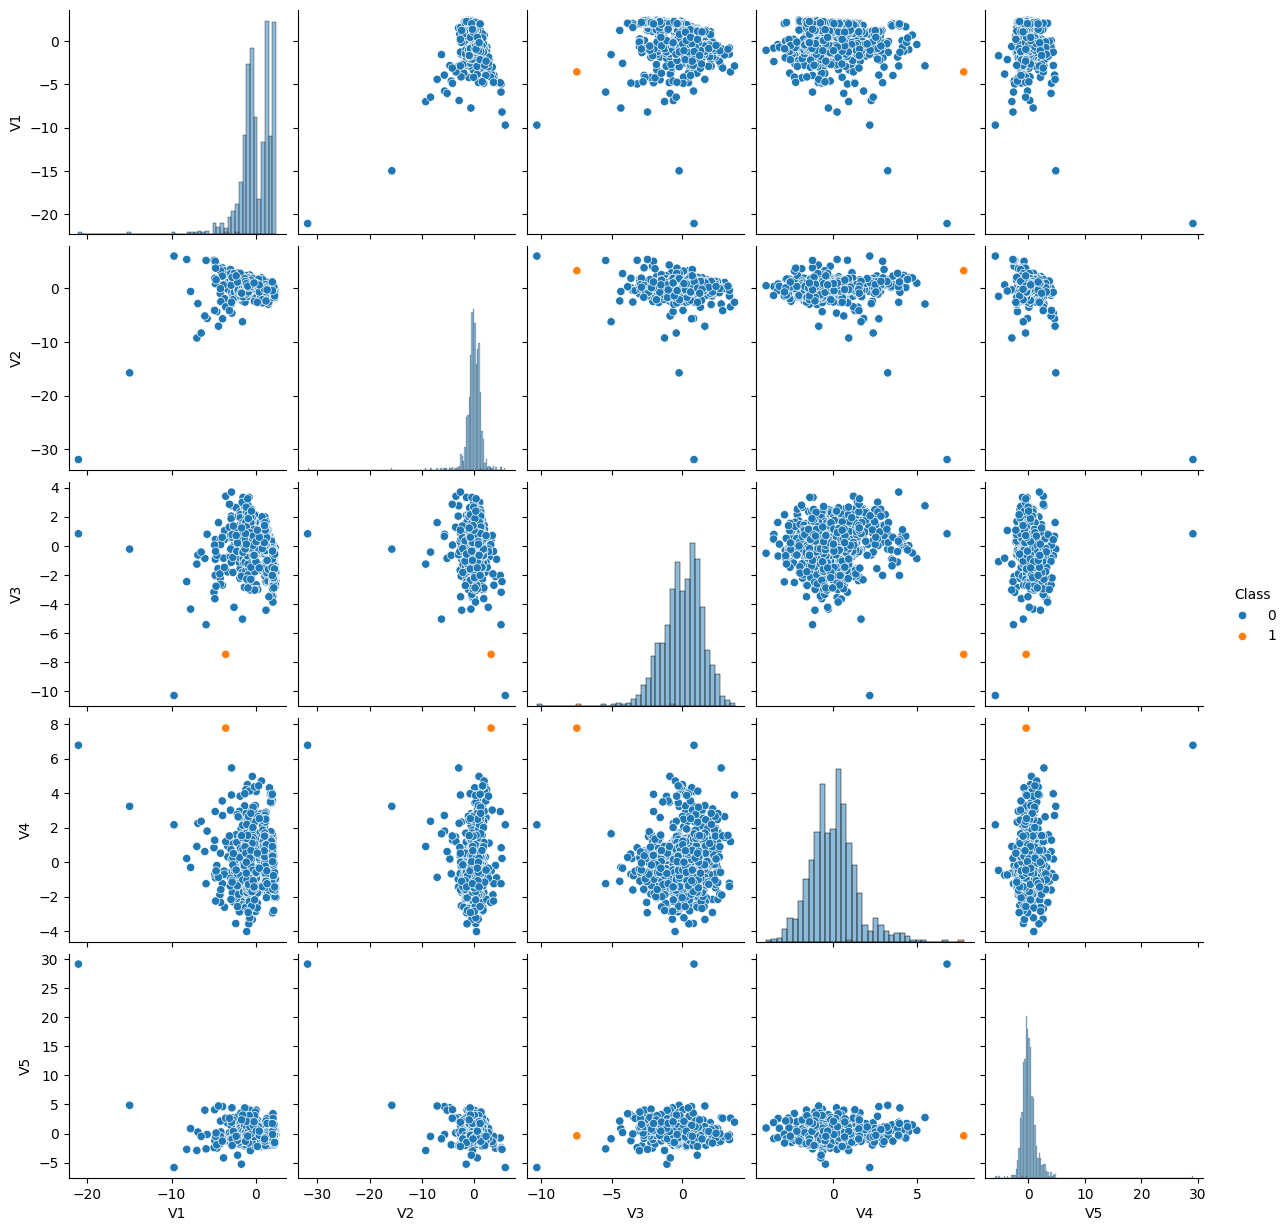

In [20]:
# Sample data and limit features
sample_data = data[['V1', 'V2', 'V3', 'V4', 'V5', 'Class']].sample(n=1000, random_state=42)

# Plot pairplot with adjusted parameters
sns.pairplot(sample_data, hue='Class', diag_kind='hist')
plt.show()

#### Feature Engineering

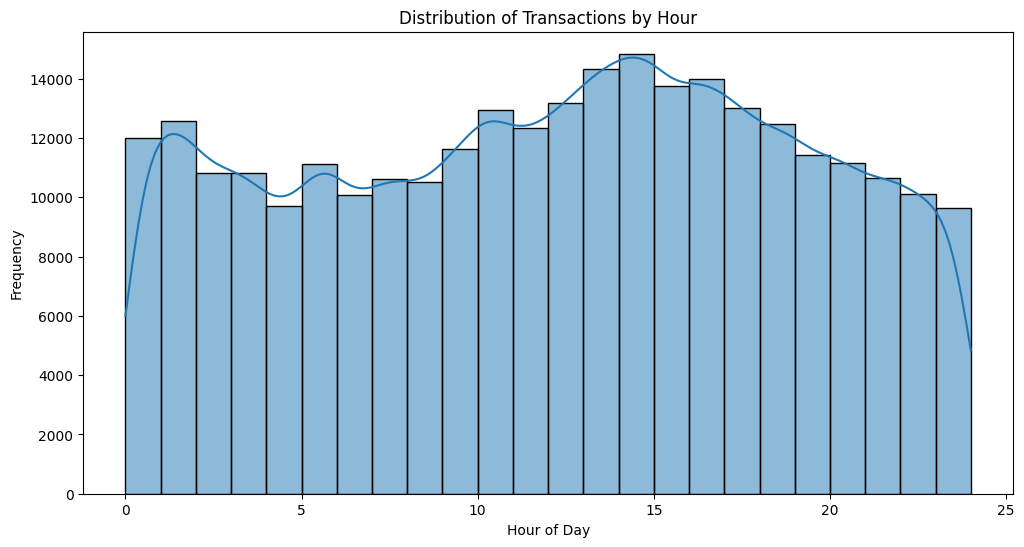

In [21]:
# Extract hour of the day from the 'Time' feature
data['Hour'] = (data['Time'] * 24) % 24

# Visualize the distribution of transactions over the day
plt.figure(figsize=(12, 6))
sns.histplot(data['Hour'], bins=24, kde=True)
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

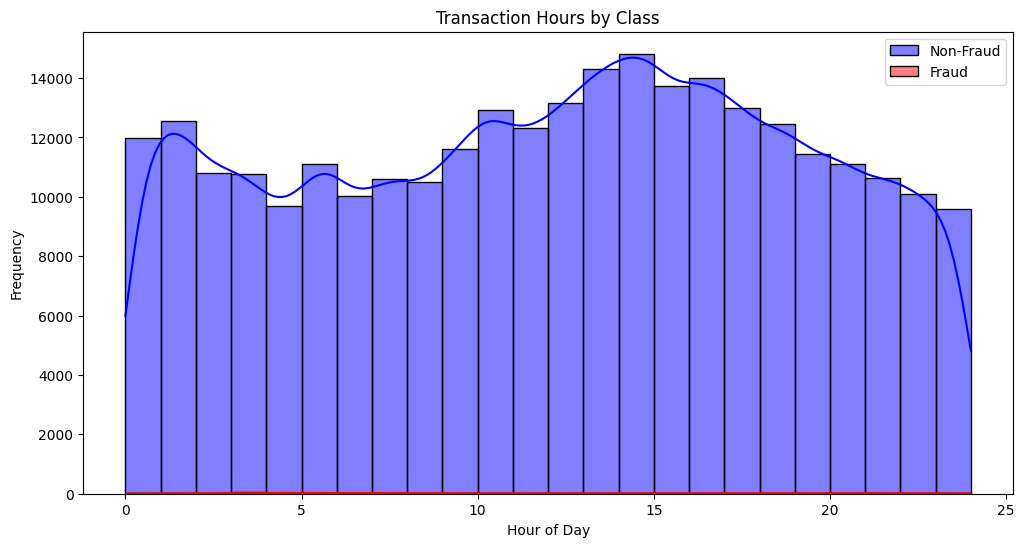

In [22]:
# Compare the transaction hours for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Class'] == 0]['Hour'], bins=24, kde=True, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Hour'], bins=24, kde=True, color='red', label='Fraud')
plt.title('Transaction Hours by Class')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()

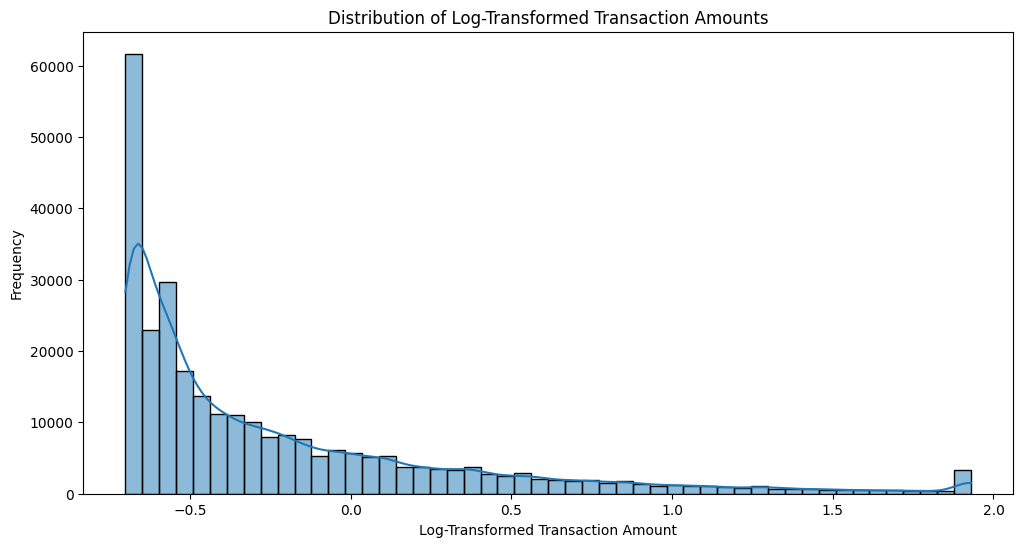

In [23]:
# Apply a log transformation to the 'Amount' feature
data['Log_Amount'] = np.log1p(data['Amount'])

# Visualize the distribution of the log-transformed amount
plt.figure(figsize=(12, 6))
sns.histplot(data['Log_Amount'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Transaction Amounts')
plt.xlabel('Log-Transformed Transaction Amount')
plt.ylabel('Frequency')
plt.show()

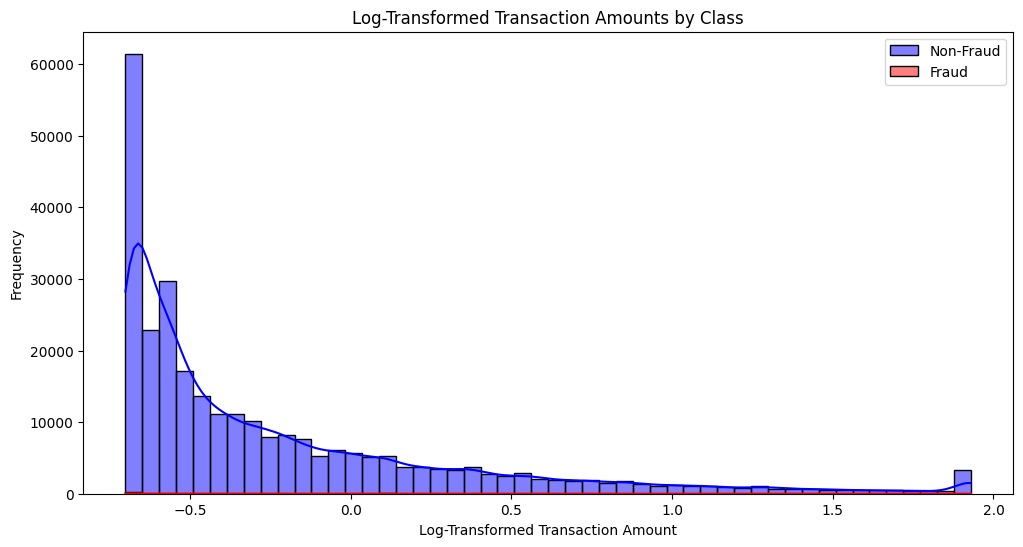

In [24]:
# Compare the log-transformed transaction amounts for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Class'] == 0]['Log_Amount'], bins=50, kde=True, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Log_Amount'], bins=50, kde=True, color='red', label='Fraud')
plt.title('Log-Transformed Transaction Amounts by Class')
plt.xlabel('Log-Transformed Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

New DataFrame with Interaction Features:
        Time        V1        V2        V3        V4        V5        V6  \
0 -1.996823 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996823  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996802 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996802 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996781 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...     V1 V2     V1 V3     V1 V4     V1 V5  \
0  0.239599  0.098698  0.363787  ...  0.098968 -3.448942 -1.874025  0.460051   
1 -0.078803  0.085102 -0.255425  ...  0.317214  0.198421  0.534136  0.071532   
2  0.791461  0.247676 -1.514654  ...  1.820416 -2.408646 -0.515875  0.683521   
3  0.237609  0.377436 -1.387024  ...  0.178979 -1.732519  0.834174  0.009961   
4  0.592941 -0.270533  0.817739  ... -1.016624 -1.793776 -0.466807  0.471625   

      V2 V3     V2 V4     

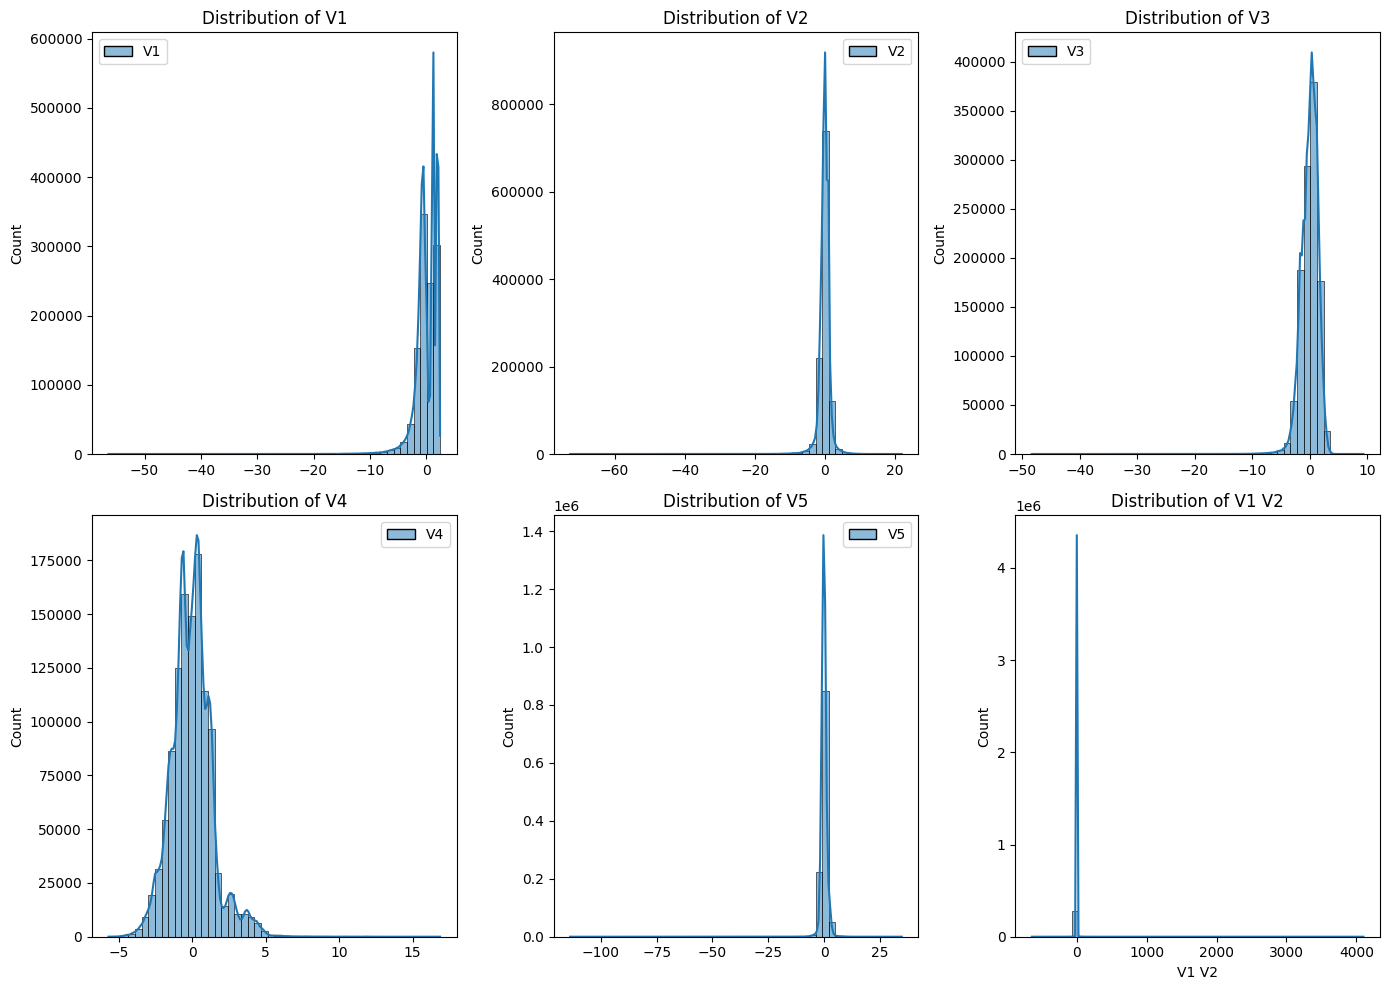

In [25]:
# Select the top PCA components to create interaction features
# Using the first 5 components as an example (V1 to V5)
pca_features = ['V1', 'V2', 'V3', 'V4', 'V5']

# Create interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interactions = poly.fit_transform(data[pca_features])

# Get feature names for the interactions
interaction_feature_names = poly.get_feature_names_out(pca_features)

# Create a DataFrame for the interaction features
interaction_features_data = pd.DataFrame(interactions, columns=interaction_feature_names)

# Merge the interaction features into the original DataFrame
data = pd.concat([data, interaction_features_data], axis=1)

# Display the new DataFrame with interaction features
print("New DataFrame with Interaction Features:\n", data.head())

# Optional: Visualize some interaction features to understand their distribution
plt.figure(figsize=(14, 10))
for i, feature in enumerate(interaction_feature_names[:6], 1):  # Plot first 6 interaction features
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#### Model Development

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler  # Importing RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import time

# Timing the execution to identify bottlenecks
start_time = time.time()

# Load data (using a smaller subset for initial debugging)
data = pd.read_csv('creditcard.csv')

# Handle missing values and duplicates
data = data.drop_duplicates()
data = data.dropna(subset=['Class'])

# Log-transform the 'Amount' feature
data['Log_Amount'] = np.log1p(data['Amount'])

# Select features and target
X = data.drop(['Class', 'Amount', 'Time'], axis=1)  # Features excluding 'Amount' and 'Time'
y = data['Class']  # Target

# Handle missing values in features
X = X.fillna(X.median())

# Use a larger subset for more robust initial experiments (10% of data for balanced testing)
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.90, random_state=42, stratify=y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)

# Define SMOTE with fewer neighbors to handle smaller subsets
smote = SMOTE(sampling_strategy=0.1, random_state=42, k_neighbors=3)

# Alternatively, define a downsampler for initial quick balancing
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# Define simplified models for faster initial testing
logistic_regression = LogisticRegression(max_iter=100, n_jobs=-1)
random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
gradient_boosting = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
neural_network = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, early_stopping=True, random_state=42)

# Create pipelines for each model using downsampling instead of SMOTE for faster testing
pipelines = {
    'Logistic Regression': ImbPipeline(steps=[('under', undersampler), ('model', logistic_regression)]),
    'Random Forest': ImbPipeline(steps=[('under', undersampler), ('model', random_forest)]),
    'Gradient Boosting': ImbPipeline(steps=[('under', undersampler), ('model', gradient_boosting)]),
    'Neural Network': ImbPipeline(steps=[('under', undersampler), ('model', neural_network)])
}

# Evaluate each model
for model_name, pipeline in pipelines.items():
    print(f"Training and evaluating model: {model_name}")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # For AUPRC and ROC-AUC
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
    auprc = auc(recall_vals, precision_vals)
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"AUPRC: {auprc}")
    print(f"ROC AUC Score: {roc_auc}\n")

# Perform hyperparameter tuning for the best performing model (example with simplified grid)
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Using RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(estimator=pipelines['Random Forest'], param_distributions=param_grid, n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and performance
print(f"Best Parameters: {random_search.best_params_}")
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # For AUPRC and ROC-AUC

# Print evaluation metrics for the best model
print("Best Model Evaluation:")
print(classification_report(y_test, y_pred_best))
print(f"Best Model Precision: {precision_score(y_test, y_pred_best)}")
print(f"Best Model Recall: {recall_score(y_test, y_pred_best)}")
print(f"Best Model F1-Score: {f1_score(y_test, y_pred_best)}")

precision_vals_best, recall_vals_best, _ = precision_recall_curve(y_test, y_pred_proba_best)
auprc_best = auc(recall_vals_best, precision_vals_best)

print(f"Best Model AUPRC: {auprc_best}")
print(f"Best Model ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_best)}")

# Output total execution time
print("Total Execution Time: %s seconds" % (time.time() - start_time))

Training and evaluating model: Logistic Regression
Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8498
           1       0.06      0.71      0.12        14

    accuracy                           0.98      8512
   macro avg       0.53      0.85      0.55      8512
weighted avg       1.00      0.98      0.99      8512

Precision: 0.06289308176100629
Recall: 0.7142857142857143
F1-Score: 0.11560693641618497
AUPRC: 0.5710484003992905
ROC AUC Score: 0.9454577547658272

Training and evaluating model: Random Forest
Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8498
           1       0.13      0.71      0.22        14

    accuracy                           0.99      8512
   macro avg       0.56      0.85      0.61      8512
weighted avg       1.00      0.99      0.99      8512

Precision: 0.12658227848101267
Recall: 0.714285714285

#### Model Evaluation

In [27]:
# Import necessary additional libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score, f1_score

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation and evaluate each model
for model_name, pipeline in pipelines.items():
    # Use cross_val_score to perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
    
    # Fit the model on the entire training data and predict probabilities on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Compute Precision-Recall Curve and AUPRC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    auprc = auc(recall, precision)
    
    # Store results
    cv_results[model_name] = {
        'CV ROC AUC': np.mean(cv_scores),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUPRC': auprc
    }
    
    # Print the detailed classification report and AUPRC
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score (cross-validated): {np.mean(cv_scores)}")
    print(f"AUPRC: {auprc}\n")

# Display the cross-validation results for all models
for model_name, metrics in cv_results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8498
           1       0.06      0.71      0.12        14

    accuracy                           0.98      8512
   macro avg       0.53      0.85      0.55      8512
weighted avg       1.00      0.98      0.99      8512

ROC AUC Score (cross-validated): 0.9772120525058685
AUPRC: 0.5710484003992905

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8498
           1       0.13      0.71      0.22        14

    accuracy                           0.99      8512
   macro avg       0.56      0.85      0.61      8512
weighted avg       1.00      0.99      0.99      8512

ROC AUC Score (cross-validated): 0.974843671537441
AUPRC: 0.6464052238802908

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8498
       

#### Deployment and Monitoring

In [28]:
import joblib

# Assuming 'best_model' is the best performing model from our previous steps
joblib.dump(best_model, 'best_model.pkl')
print("Model serialized and saved as 'best_model.pkl'")

Model serialized and saved as 'best_model.pkl'
